# **SYRIATEL CUSTOMER CHURN**

Author: Caleb Ochieng

<img src="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*47xx1oXuebvYwZeB0OutuA.png" alt="Image Description" width="800" height="200">

## **BUSINESS UNDERSTANDING**

To get a picture of the project, I will explore the background of the analysis (consumers of this project's output and what problems I am targeting to solve) and identify project objectives.

**BACKGROUND**

Customer churn, the process of losing customers, represents a significant challenge for businesses, with direct repercussions on their revenue and overall financial health. My target audience for this analysis are the telecommunications companies. These companies can use this dataset to predict which customers are likely to churn. They can then take proactive measures to retain those customers, such as offering discounts, improving customer service, or introducing targeted marketing campaigns.

Business problems identifiable in this project are such as:

- **Customer Churn Prediction**: Identifying which customers are at risk of leaving SyriaTel's services, such as mobile plans, internet subscriptions, or other telecommunications offerings. The significance of this problem is that it directly affects revenue and profitability. Predicting and reducing churn can lead to increased customer retention and higher revenue.


- **Customer Segmentation**: Identifying different customer segments based on their behavior, preferences, and likelihood of churn. Understanding customer segments can help tailor marketing and retention strategies to each group's specific needs and preferences.


- **Service Quality Improvement**: Identifying factors that contribute to customer dissatisfaction and churn, such as network quality, customer service issues, or pricing concerns.  Improving service quality can lead to higher customer satisfaction and reduced churn.


- **Pricing Strategy Optimization**: Determining the optimal pricing strategy to minimize churn while maximizing revenue. Finding the right balance between pricing and customer retention is crucial for profitability.


- **Marketing Effectiveness**:  Assessing the effectiveness of marketing campaigns and making adjustments to target customer segments more effectively.Optimizing marketing efforts can lead to improved customer retention and acquisition.



**OBJECTIVES**

The primary aim of conducting this analysis is to achieve the following objectives:

1. **Churn Prediction**: Construct precise machine learning models that can anticipate which customers are most likely to churn in the future.

    This is driven by the idea that by recognizing customers at risk of churn, SyriaTel can proactively implement retention strategies, such as providing incentives, enhancing customer service, and tailoring marketing approaches to their preferences. Accurate churn prediction ultimately leads to a decline in customer attrition and an increase in customer retention.



2. **Model Performance Assessment**: Appraise the performance of diverse machine learning models to identify the most effective model for predicting churn.

    By comparing the performance of various models, SyriaTel can confidently select the most efficient one. This ensures that resources are optimally allocated for the implementation of churn-reduction strategies.


3. **Feature Importance and Insights**: Examine the significance of individual features to gain insights into the fundamental drivers of customer churn within the telecommunications industry.

    The underlying rationale is that identifying the most influential factors contributing to churn offers valuable insights for informed decision-making. SyriaTel can leverage this knowledge to make strategic business decisions, allocate resources efficiently, and implement targeted measures to reduce churn.

## **DATA UNDERSTANDING**

To better serve the identified consumers and clearly project the problem(s) stated in the background, I will use the ***Churn in Telecom's dataset*** from Kaggle (https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset).

I first import all the necessary libraries that will support my analysis and modeling

In [11]:
#import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score

I then load my data to view what it looks like

In [12]:
#load the dataset into a pandas dataframe
data = pd.read_csv("SyriaTel_Customer_Churn_data.csv.csv")
data

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [13]:
#view the shape of the dataframe
data.shape #rows, columns

(3333, 21)

In [14]:
# Printing the count of true and false in 'Churn' features
# churn is divided as: true if the customer terminated their contract, otherwise false
data["churn"].value_counts()

False    2850
True      483
Name: churn, dtype: int64

Viewing the dataframe to look for the columns, missing values and the data types

In [15]:
#view data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

My data has 20 columns and no missing values

In [16]:
#generating summary statistics
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


What is the distribution of my data?

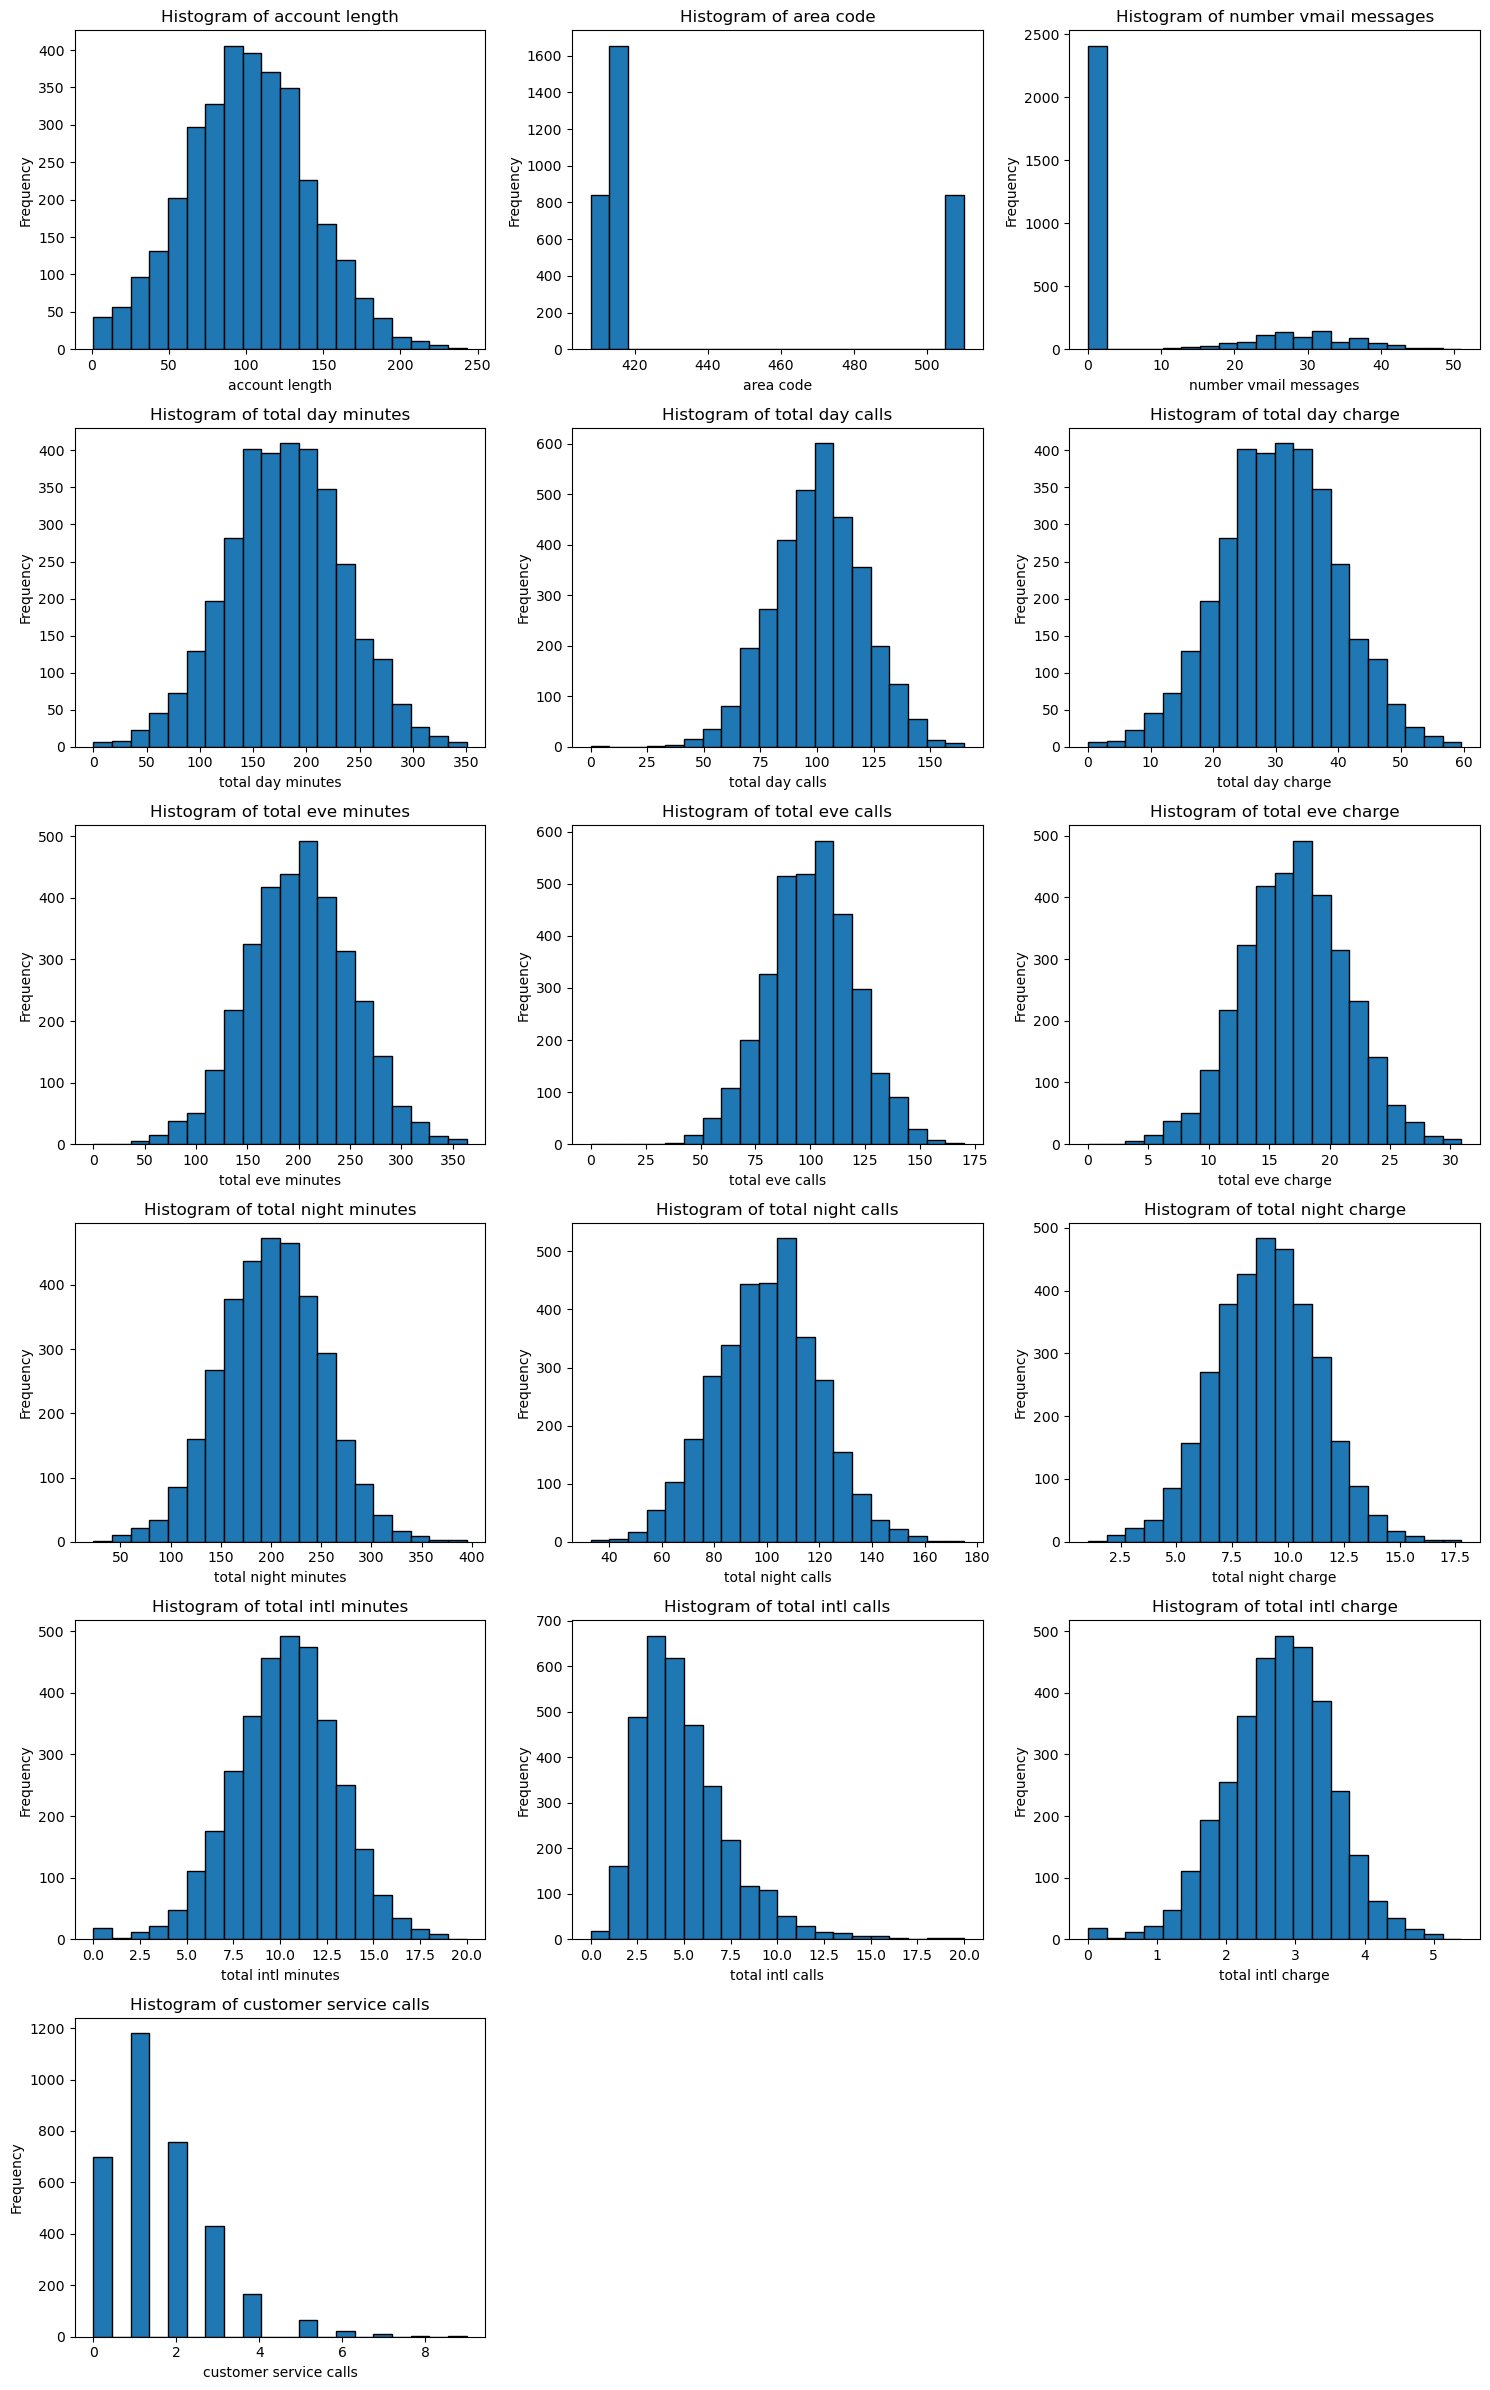

In [17]:
# Explore the distribution of numeric columns
numeric_columns = data.select_dtypes(include=['int64', 'float64'])
num_columns = numeric_columns.columns

# Determine the layout for subplots
num_subplots = len(num_columns)
subplots_per_row = 3
num_rows = (num_subplots - 1) // subplots_per_row + 1

# Create subplots and display histograms
fig, axes = plt.subplots(num_rows, subplots_per_row, figsize=(15, 4 * num_rows))

for i, column in enumerate(num_columns):
    row_idx = i // subplots_per_row
    col_idx = i % subplots_per_row
    ax = axes[row_idx, col_idx]

    ax.hist(data[column], bins=20, edgecolor='black')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Remove any empty subplots
for i in range(num_subplots, num_rows * subplots_per_row):
    fig.delaxes(axes[i // subplots_per_row, i % subplots_per_row])

plt.tight_layout()
plt.show()

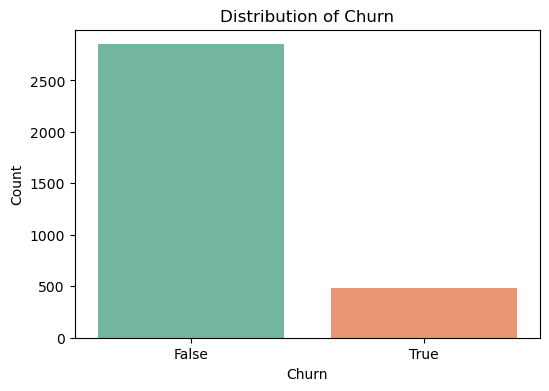

In [18]:
# Visualize the distribution of the 'churn' column (target variable)
plt.figure(figsize=(6, 4))
sn.countplot(data=data, x='churn', palette='Set2')
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

How many observations does my dataset contain? Do I have sufficient data for my project or only a little?

In [19]:
# Count the number of observations in the dataset
num_observations = len(data)

# Determine if we have a lot of data or only a little
if num_observations > 1000:
    data_size = "I have sufficient data for my project."
else:
    data_size = "I have only a little data."

num_observations, data_size

(3333, 'I have sufficient data for my project.')

From the above, I can therefore conclude that my data is correct, was collected with a lot of intent, has features that will assist in achieving my objectives and further exploration will definetly lead me to meeting my project's goal.

## **EXPLORATORY DATA ANALYSIS**

## **DATA PREPARATION**

After gaining a comprehensive grasp of our data, the next step involves preparing the data for our modeling phases.

In this stage, we will address the following tasks:
1. Identifying and addressing missing values.
2. Converting data types, such as converting numeric data encoded as strings.
3. Carrying out univariate, bivariate and multivariate analysis (correlation heatmap).
3. Identifying and resolving multicollinearity, which involves handling correlated predictor variables.
4. Normalizing our numerical data to ensure consistent scaling.
5. Transforming categorical data into a numerical format using techniques like one-hot encoding.

In [20]:
#checking for missing values
data.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

My data has no missing values. This is good

In [21]:
#checking for duplicates
data.duplicated().sum()

0

My data has no duplicates. This is also good

In [22]:
#Calculate the number of unique values for each column in the dataset
data.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

Checking for unique values is important for various reasons; notable ones here are:

1. Modeling considerations: The number of unique values in each column is crucial for feature engineering and model selection. High-cardinality features might require special handling during feature selection and preprocessing steps.


2. Imbalance in binary classification: For the "churn" column, which appears to be a binary classification target, knowing the number of unique values is important. In this case, there are two unique values, which suggests that it's a binary classification problem with two classes (e.g., "churn" and "no-churn"). An imbalance in class distribution can impact model performance.


3. Multicollinearity assessment: When dealing with numeric features, having a low number of unique values suggests that these columns may not contain a wide range of values and could potentially be correlated with other features. High multicollinearity could affect model performance.

Convert data types, such as converting numeric data encoded as strings.

In [23]:
# List of columns to convert from string to numeric
columns_to_convert = ['account length', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge']

# Convert data types
for column in columns_to_convert:
    data[column] = pd.to_numeric(data[column], errors='coerce')  # 'coerce' handles non-convertible values by converting them to NaN

# Verify data types
print(data.dtypes)

# Now, these columns should be converted to numeric types for further analysis or modeling.

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object


Change column names by removing spaces and adding underscore

In [24]:
# Replace spaces with underscores in column names
data.columns = data.columns.str.replace(' ', '_')

Carrying out univariate, bivariate and multivariate analysis.

**Univariate Analysis**

Carry out a univariate analysis of each column and display their distribution on a histogram with a kde curve showing their distribution.

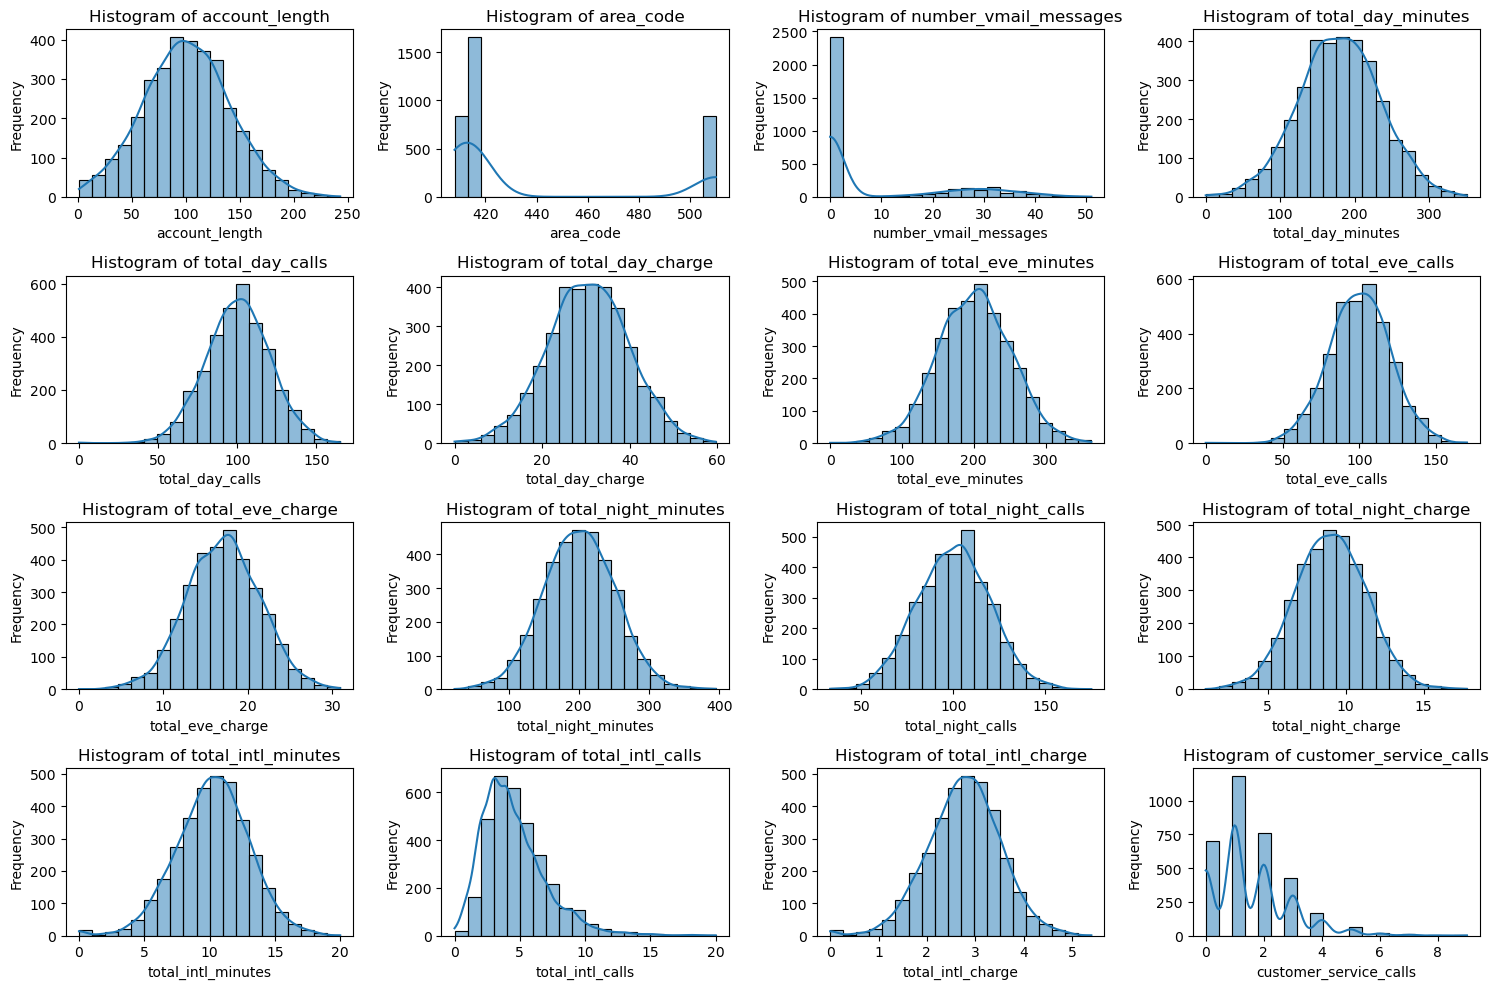

In [25]:
# List of numeric columns for univariate analysis
numeric_columns = data.select_dtypes(include=['int64', 'float64'])

# Plot histograms for numeric columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns.columns):
    plt.subplot(4, 4, i + 1)
    sn.histplot(data[column], bins=20, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

I have displayed histograms with KDE curves for all numeric columns to show their trend. It is safe to state that most of the colums have a normal distribution except for 'area_code', 'number_vmail_messages', 'total_intl_calls' and 'customer_service_calls'. The 'area_code' shows that most subscribers come from an area code of between 0 and 420; close to 0 subscribers sent over 2000 voicemails according to the number_vmail_messages histogram. The total_intl_calls is skewed to the right with less than 5 customers making a little over 600 international calls; the customer_service_calls histogram is skewed to the right, with about 1200 customers making up to 1 customer service calls per day.

**Bivariate Analysis**

Bivariate analysis involves exploring the relationships between two variables. Here, we'll perform a basic bivariate analysis for illustrative purposes.

Relationship between 'international_plan' and 'churn'

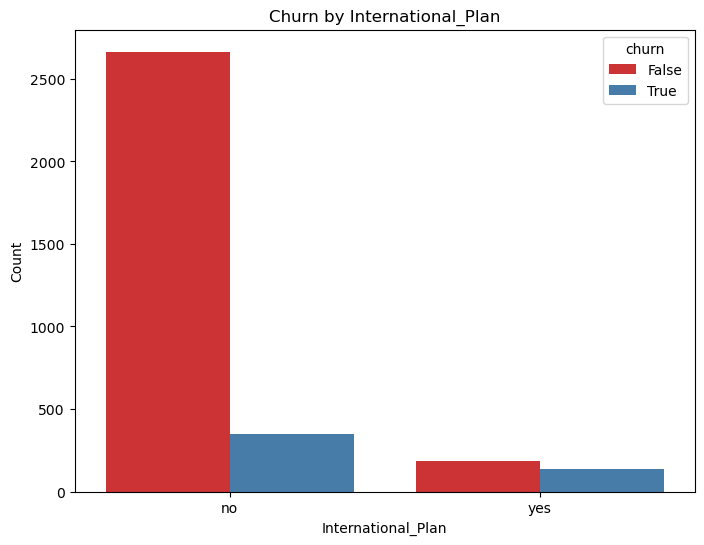

In [26]:
# Visualize the relationship between 'international plan' and 'churn'
plt.figure(figsize=(8, 6))
sn.countplot(data=data, x='international_plan', hue='churn', palette='Set1')
plt.title('Churn by International_Plan')
plt.xlabel('International_Plan')
plt.ylabel('Count')
plt.show()

Relationship between 'voice_mail_plan' and 'churn'

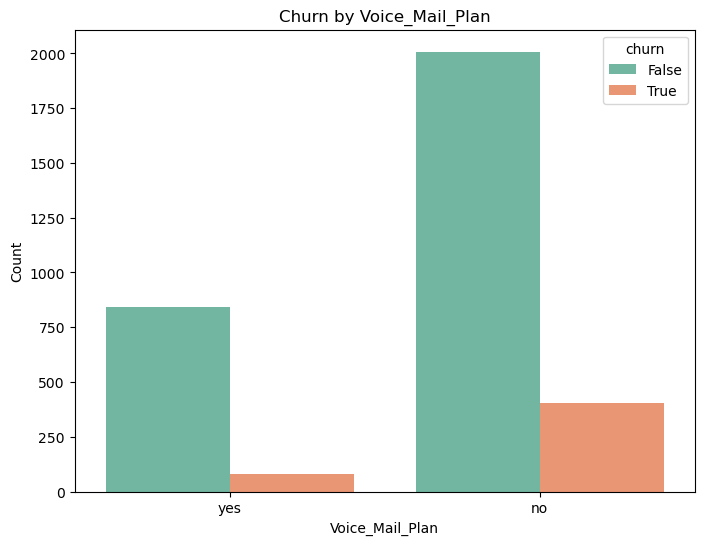

In [27]:
# Visualize the relationship between 'voice mail plan' and 'churn'
plt.figure(figsize=(8, 6))
sn.countplot(data=data, x='voice_mail_plan', hue='churn', palette='Set2')
plt.title('Churn by Voice_Mail_Plan')
plt.xlabel('Voice_Mail_Plan')
plt.ylabel('Count')
plt.show()

Relationship between 'area_code' and 'churn'

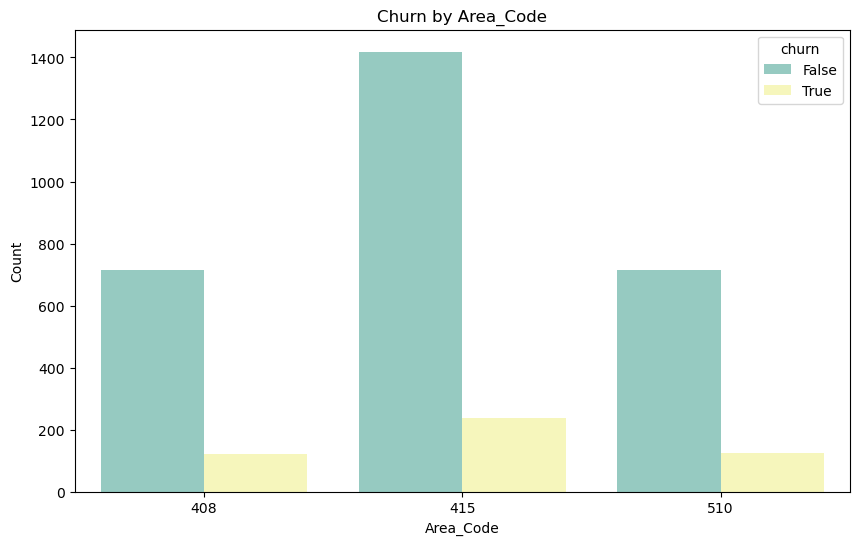

In [28]:
# Visualize the relationship between 'area code' and 'churn'
plt.figure(figsize=(10, 6))
sn.countplot(data=data, x='area_code', hue='churn', palette='Set3')
plt.title('Churn by Area_Code')
plt.xlabel('Area_Code')
plt.ylabel('Count')
plt.show()

Relationship between 'state' and 'churn'

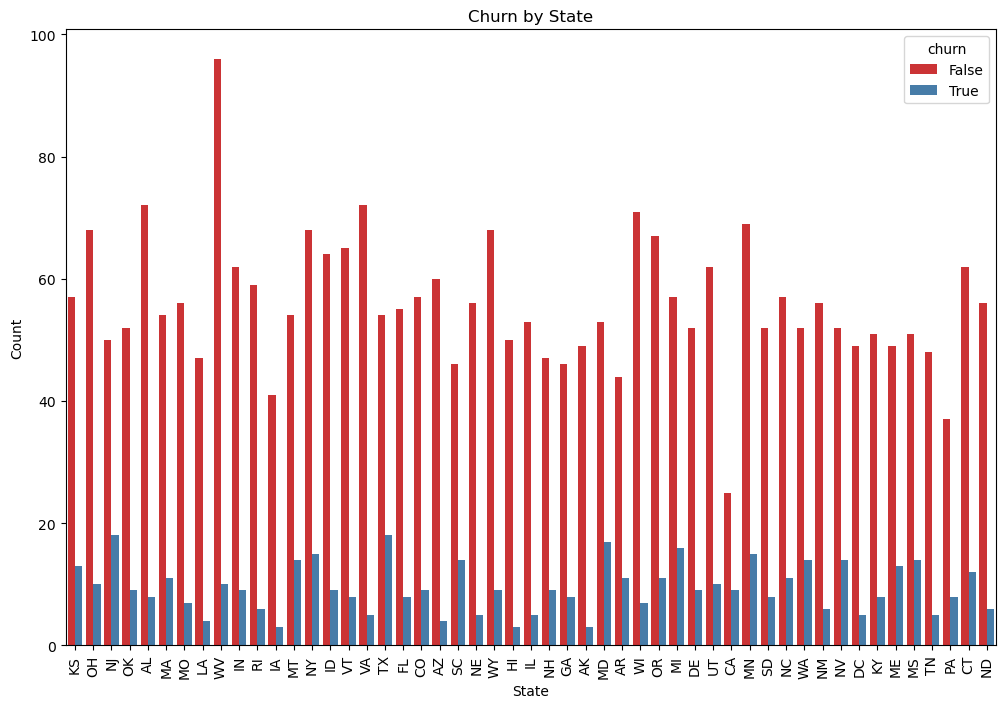

In [29]:
# Visualize the relationship between 'state' and 'churn'
plt.figure(figsize=(12, 8))
sn.countplot(data=data, x='state', hue='churn', palette='Set1')
plt.title('Churn by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate state names for readability
plt.show()

Relationship between 'total_day_minutes' and 'churn'

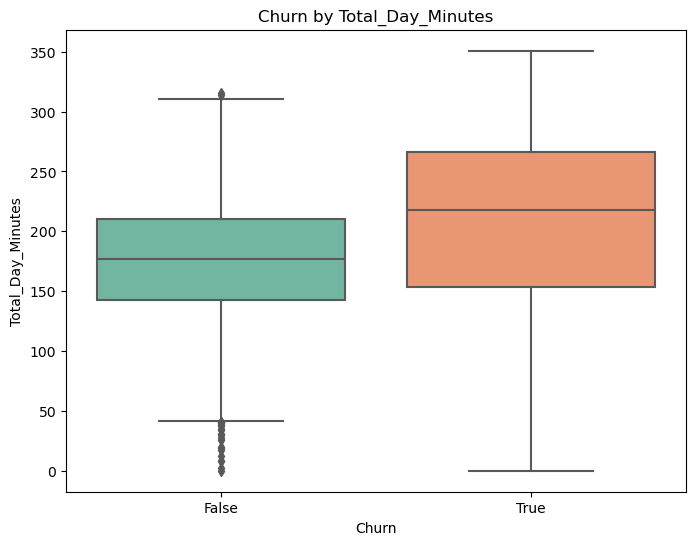

In [30]:
# Visualize the relationship between 'total day minutes' and 'churn'
plt.figure(figsize=(8, 6))
sn.boxplot(data=data, x='churn', y='total_day_minutes', palette='Set2')
plt.title('Churn by Total_Day_Minutes')
plt.xlabel('Churn')
plt.ylabel('Total_Day_Minutes')
plt.show()

Relationship between 'customer_service_calls' and 'churn'

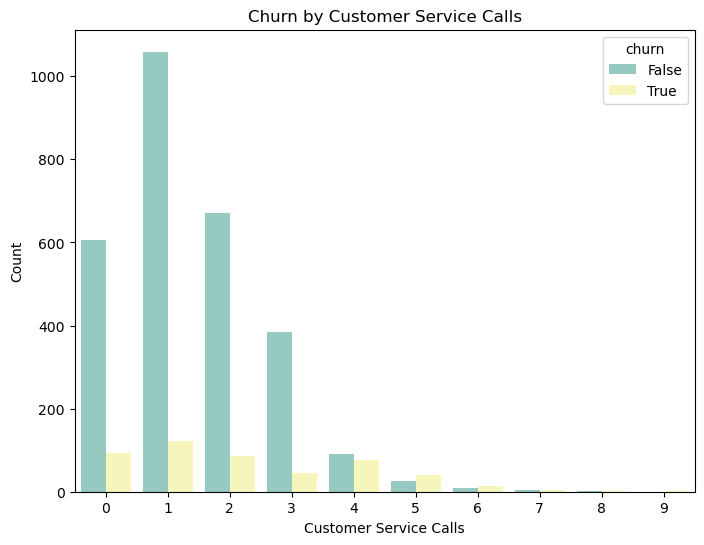

In [31]:
# Visualize the relationship between 'customer service calls' and 'churn'
plt.figure(figsize=(8, 6))
sn.countplot(data=data, x='customer_service_calls', hue='churn', palette='Set3')
plt.title('Churn by Customer Service Calls')
plt.xlabel('Customer Service Calls')
plt.ylabel('Count')
plt.show()

**Multivariate Analysis (correlation heatmap)**

C:\Users\USER\AppData\Local\Temp\ipykernel_10200\4012027126.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


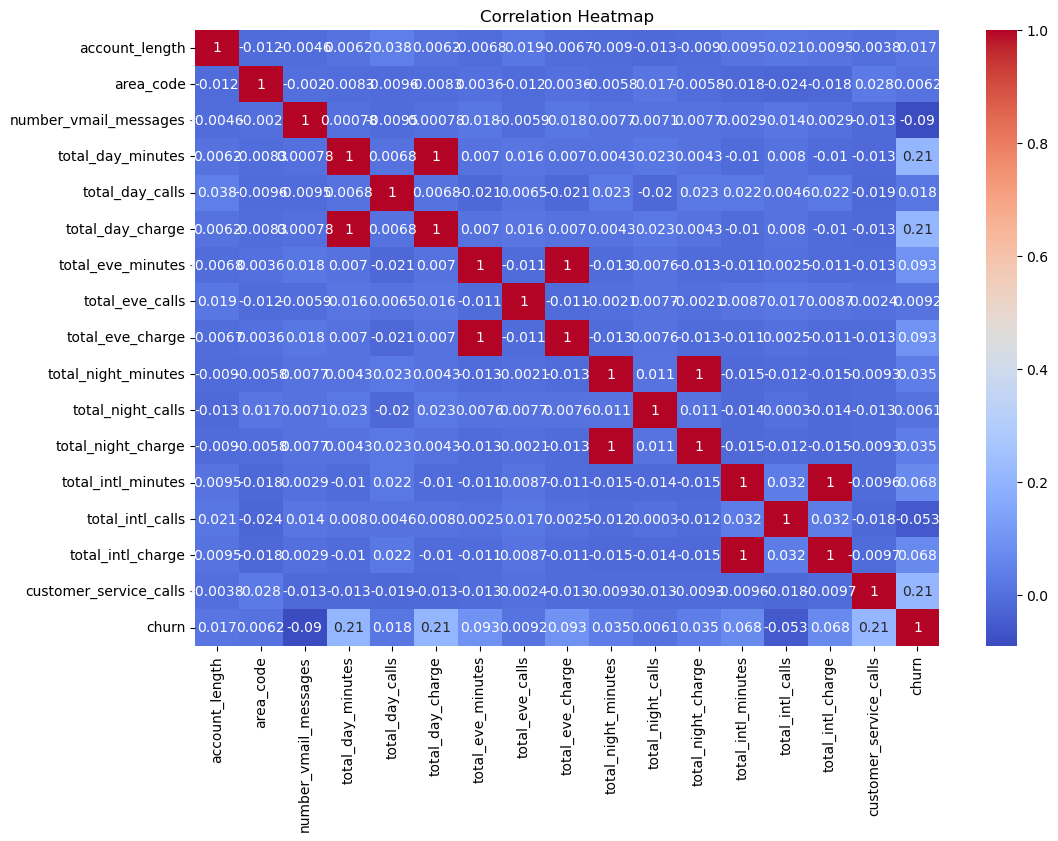

In [32]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Identifying and resolving multicollinearity, which involves handling correlated predictor variables.**

The code below calculates and displays the VIF values for each of your numeric predictor variables. High VIF values (typically above 5 or 10) may indicate multicollinearity, suggesting that those variables are highly correlated with others in your dataset. 

In [33]:
# Select only the numeric columns (excluding 'churn')
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Create a DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data["Variable"] = numeric_data.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_data.values, i) for i in range(numeric_data.shape[1])]

# Display the VIF values
vif_data

,Variable,VIF
0,account_length,7.293103e+00
1,area_code,6.102501e+01
2,number_vmail_messages,1.351056e+00
3,total_day_minutes,1.246034e+08
4,total_day_calls,2.361747e+01
5,total_day_charge,1.246078e+08
6,total_eve_minutes,3.741752e+07
7,total_eve_calls,2.375305e+01
8,total_eve_charge,3.741886e+07
9,total_night_minutes,1.071952e+07


Looking at the VIF values:

- Variables like "total_day_minutes," "total_day_charge," "total_eve_minutes," "total_eve_charge," "total_night_minutes," and "total_night_charge" have extremely high VIF values (in the order of 10^7 or 10^8). These values are significantly higher, suggesting strong multicollinearity. This could be due to high correlations between these variables.


- Variables like "area_code" also have a relatively high VIF of 61, indicating multicollinearity.


- Other variables like "number_vmail_messages," "total_intl_minutes," "total_intl_calls," and "customer_service_calls" have lower VIF values, indicating lower multicollinearity.

Variables with high VIF values (above 10) are problematic because they can lead to unstable regression coefficients and reduced interpretability.

**Excluding Certain Columns from the Dataset**


I will remove the "account length," "phone number," and "state" columns for the following reasons:

1. The "phone number" does not provide valuable insights into customer behavior.
2. "Account length" is not a robust indicator of customer loyalty without further context, making it an unreliable predictor.
3. Retaining "area code" and "state" in the dataset would constrain predictions to specific regions, limiting its applicability beyond those locales.

In [34]:
columns_to_drop = ['account_length', 'phone_number', 'area_code', 'state']
data.drop(columns = columns_to_drop, inplace=True)

**Normalizing our numerical data to ensure consistent scaling**

In [35]:
# Select the numerical columns to normalize
numerical_columns = [
    'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge',
    'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
    'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
    'total_intl_charge']

# Initialize the StandardScaler
scaler = StandardScaler()

# Normalize the selected columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

This code scales the numerical data using the StandardScaler, which makes the data have a mean of 0 and a standard deviation of 1.

**Transforming categorical data into a numerical format using techniques like one-hot encoding**

In [36]:
# Define the categorical columns
categorical_columns = ['international_plan', 'voice_mail_plan', 'churn']

# Define the continuous columns
continuous_columns = ['number_vmail_messages', 'total_day_minutes', 'total_day_calls',
                      'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
                      'total_eve_charge', 'total_night_minutes', 'total_night_calls',
                      'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
                      'total_intl_charge', 'customer_service_calls']

# Apply one-hot encoding to the categorical columns
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Display the updated DataFrame
data.head()

,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,international_plan_yes,voice_mail_plan_yes,churn_True
0,1.234883,1.566767,0.476643,1.567036,-0.070610,-0.055940,-0.070427,0.866743,-0.465494,0.866029,-0.085008,-0.601195,-0.085690,1,0,1,0
1,1.307948,-0.333738,1.124503,-0.334013,-0.108080,0.144867,-0.107549,1.058571,0.147825,1.059390,1.240482,-0.601195,1.241169,1,0,1,0
2,-0.591760,1.168304,0.675985,1.168464,-1.573383,0.496279,-1.573900,-0.756869,0.198935,-0.755571,0.703121,0.211534,0.697156,0,0,0,0
3,-0.591760,2.196596,-1.466936,2.196759,-2.742865,-0.608159,-2.743268,-0.078551,-0.567714,-0.078806,-1.303026,1.024263,-1.306401,2,1,0,0
4,-0.591760,-0.240090,0.626149,-0.240041,-1.038932,1.098699,-1.037939,-0.276311,1.067803,-0.276562,-0.049184,-0.601195,-0.045885,3,1,0,0


One-Hot Encoding (OHE) is the optimal choice for encoding this dataset's categorical variables ('international_plan,' 'voice_mail_plan,' and 'churn'). OHE suits nominal data, provides interpretability through binary columns, naturally handles multicollinearity, is insensitive to category value ranges, is compatible with various algorithms, and is straightforward to implement using libraries like scikit-learn and pandas. Its use is ideal for maintaining data integrity and enabling effective model training.

## **Modeling**

Now that my data is clean, I can begin modeling! In this stage, my aim is to answer the following:

1. Is this a classification task or a regression task?
2. What models will I try?
3. How do I deal with overfitting?
4. Do we need to use regularization or not?
5. What sort of validation strategy will I be using to check that our model works well on unseen data?
6. What loss functions will I use?
7. What threshold of performance do I consider as successful?

**Classification task or a regression task?**

My dataset is a classification task. The presence of the 'churn' column, which typically indicates whether a customer has churned (binary outcome), shows that the task involves classifying customers into two categories: those who have churned ('churn' = True) and those who haven't ('churn' = False). This binary classification problem aims to predict customer churn based on the provided features, making it a classification task.

**Preprocessing the data**

In [37]:
# predators
x = data.drop('churn_True', axis=1)

# target
y = data['churn_True']

**Train-Test Split**

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

**Checking for class imbalance**

You should check for class imbalance before building machine learning models, as class imbalances can significantly impact model performance. For example, imbalanced classes can lead to models that are biased toward the majority class, resulting in poor predictive accuracy for the minority class.

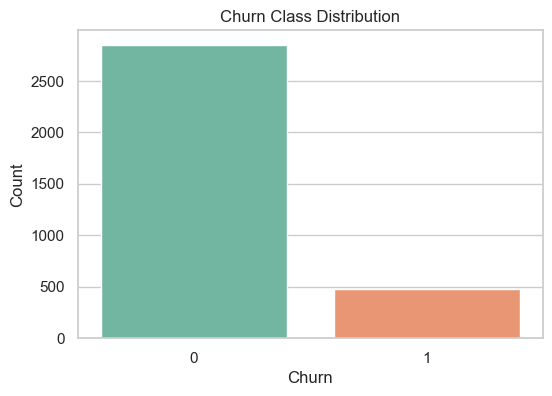

In [39]:
# Dataset is stored in the 'data' variable
sn.set(style="whitegrid")
plt.figure(figsize=(6, 4))

sn.countplot(x="churn_True", data=data, palette='Set2')
plt.title('Churn Class Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')

plt.show()

In [40]:
y_train.value_counts()

0    2284
1     382
Name: churn_True, dtype: int64

**Dealing with Class inbalance**

In [41]:
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [42]:
y_train_resampled.value_counts()

0    2284
1    2284
Name: churn_True, dtype: int64

In [43]:
data

,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,international_plan_yes,voice_mail_plan_yes,churn_True
0,1.234883,1.566767,0.476643,1.567036,-0.070610,-0.055940,-0.070427,0.866743,-0.465494,0.866029,-0.085008,-0.601195,-0.085690,1,0,1,0
1,1.307948,-0.333738,1.124503,-0.334013,-0.108080,0.144867,-0.107549,1.058571,0.147825,1.059390,1.240482,-0.601195,1.241169,1,0,1,0
2,-0.591760,1.168304,0.675985,1.168464,-1.573383,0.496279,-1.573900,-0.756869,0.198935,-0.755571,0.703121,0.211534,0.697156,0,0,0,0
3,-0.591760,2.196596,-1.466936,2.196759,-2.742865,-0.608159,-2.743268,-0.078551,-0.567714,-0.078806,-1.303026,1.024263,-1.306401,2,1,0,0
4,-0.591760,-0.240090,0.626149,-0.240041,-1.038932,1.098699,-1.037939,-0.276311,1.067803,-0.276562,-0.049184,-0.601195,-0.045885,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,2.038605,-0.432895,-1.167924,-0.433386,0.286348,1.299506,0.286880,1.547039,-0.874374,1.547188,-0.120832,0.617898,-0.125496,2,0,1,0
3329,-0.591760,0.942447,-2.164631,0.942714,-0.938353,-2.264816,-0.938172,-0.189297,1.170023,-0.188670,-0.228304,-0.194831,-0.231645,3,0,0,0
3330,-0.591760,0.018820,0.426808,0.019193,1.731930,-2.114211,1.732349,-0.177431,-0.465494,-0.175486,1.383778,0.617898,1.387123,2,0,0,0
3331,-0.591760,0.624778,0.227466,0.625153,-0.816080,-0.808966,-0.815203,-1.219628,1.885562,-1.221396,-1.876211,2.243356,-1.876950,2,1,0,0


I will explore the following models for the dataset:

1. Logistic Regression Model
2. Random Forest classifier
3. XGBoost
4. Support Vector Machine (SVM)
5. K-Nearest Neighbors (KNN)

**Logistic Regression Model**

Logistic Regression is a good starting point for binary classification tasks. It's simple, interpretable, and works well for linearly separable data.

In [44]:
# Create and train the Logistic Regression model on the resampled data
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(x_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = logistic_model.predict(x_test)

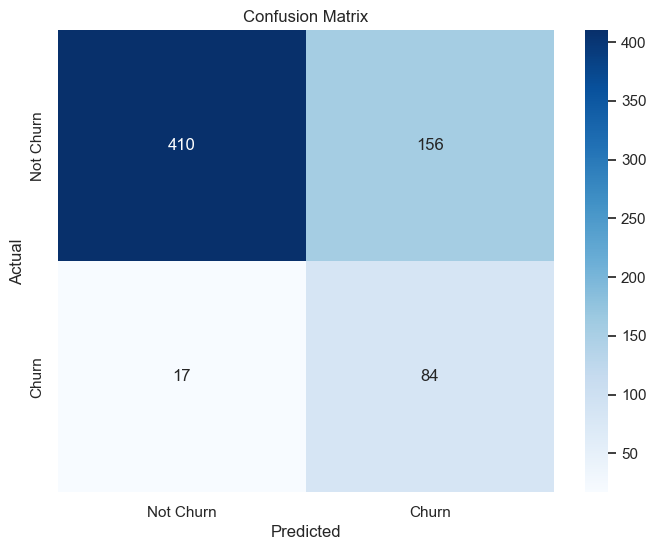

In [45]:
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sn.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Usage
plot_confusion_matrix(y_test, y_pred, labels=['Not Churn', 'Churn'])

In [46]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print("-----------------------------------\n")

report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

Accuracy: 0.74
-----------------------------------

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.72      0.83       566
           1       0.35      0.83      0.49       101

    accuracy                           0.74       667
   macro avg       0.66      0.78      0.66       667
weighted avg       0.87      0.74      0.78       667



The logistic regression model achieved a 74% accuracy, excelling in correctly predicting non-churning customers with 96% precision. It maintained a robust 83% recall for churning customers, though precision was lower at 35%. The F1-scores were 0.83 for non-churning and 0.49 for churning, leading to macro and weighted average F1-scores of 0.66 and 0.78, respectively. While it performs well in identifying non-churning customers, enhancing churn prediction should be considered, emphasizing the importance of aligning the model's objectives with application-specific needs.

**Random Forest classifier**

In [47]:
# Create and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train_resampled, y_train_resampled)

# Make predictions on the test data
y_rf_pred = rf_model.predict(x_test)

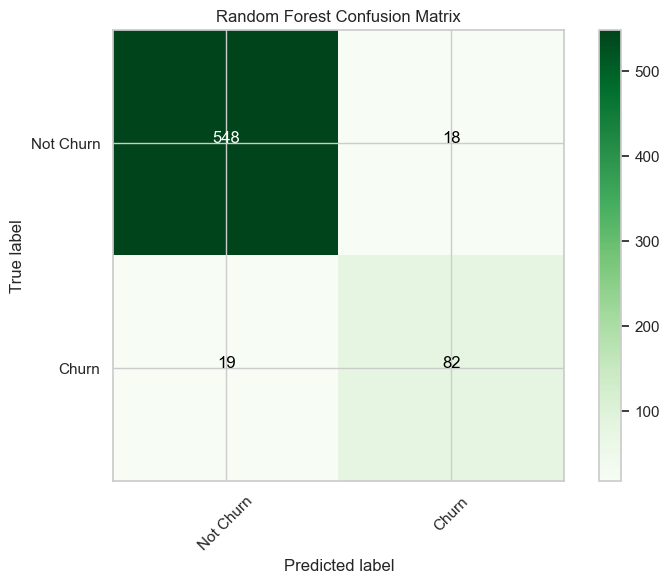

In [48]:
# Calculate the confusion matrix
cm_rf = confusion_matrix(y_test, y_rf_pred)

# Create a custom confusion matrix plot
plt.figure(figsize=(8, 6))
plt.imshow(cm_rf, interpolation='nearest', cmap=plt.cm.Greens)
plt.title('Random Forest Confusion Matrix')
plt.colorbar()

classes = ['Not Churn', 'Churn']
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm_rf.max() / 2.
for i in range(cm_rf.shape[0]):
    for j in range(cm_rf.shape[1]):
        plt.text(j, i, format(cm_rf[i, j], 'd'), horizontalalignment="center", color="white" if cm_rf[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

plt.show()

In [49]:
# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_rf_pred)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')

print("-----------------------------------\n")

# You can also print the classification report for a detailed evaluation
report_rf = classification_report(y_test, y_rf_pred)
print('Random Forest Classification Report:\n', report_rf)

Random Forest Accuracy: 0.94
-----------------------------------

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       566
           1       0.82      0.81      0.82       101

    accuracy                           0.94       667
   macro avg       0.89      0.89      0.89       667
weighted avg       0.94      0.94      0.94       667



The Random Forest model outperformed the Logistic Regression model with an impressive 94% accuracy. It showed exceptional precision (97%) and recall (97%) for non-churning customers (class 0), resulting in a high F1-score of 0.97, indicating a well-balanced model. While precision for churning customers (class 1) was slightly lower at 82%, it still maintained a reasonable recall of 81%, yielding a good F1-score of 0.82. The macro and weighted average F1-scores were 0.89 and 0.94, respectively, reflecting strong overall model performance. These results highlight the Random Forest model's effectiveness in predicting both non-churning and churning customers.

**XGBoost**

In [50]:
# Create and train the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(x_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(x_test)

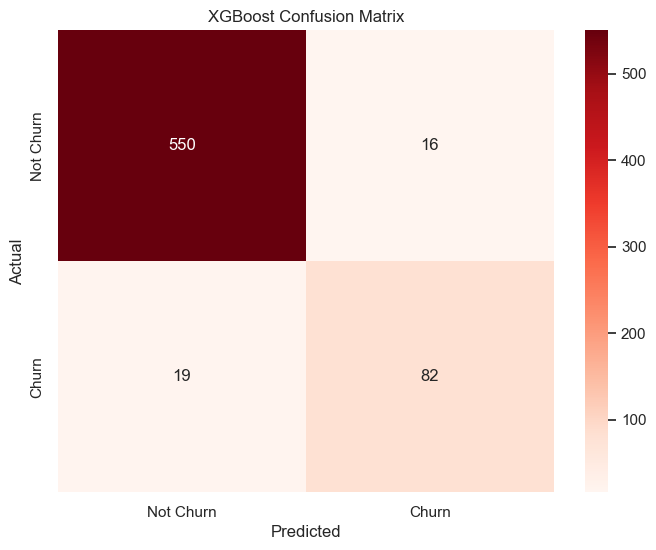

In [51]:
# Calculate the confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Create the confusion matrix plot
fig, ax = plt.subplots(figsize=(8, 6))
sn.heatmap(cm_xgb, annot=True, fmt='d', cmap='Reds', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix')
plt.show()

In [52]:
# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb:.2f}')

print("-----------------------------------\n")

# Print the classification report
report_xgb = classification_report(y_test, y_pred_xgb)
print('XGBoost Classification Report:\n', report_xgb)

XGBoost Accuracy: 0.95
-----------------------------------

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       566
           1       0.84      0.81      0.82       101

    accuracy                           0.95       667
   macro avg       0.90      0.89      0.90       667
weighted avg       0.95      0.95      0.95       667



The XGBoost model outshines the Random Forest and Logistic Regression models, boasting a higher accuracy of 95% compared to 94% and 74%, respectively. It excels in accurately identifying both non-churning and churning customers. For non-churning cases, XGBoost achieves remarkable precision and recall, surpassing the other models. In the case of churning customers, while it has slightly lower precision than Random Forest, it outperforms Logistic Regression. XGBoost's strong F1-scores (0.82), macro average (0.90), and weighted average (0.95) underscore its overall superior performance, making it the top-performing model among the three.

**Support Vector Machine (SVM)**

In [53]:
# Create an SVM classifier
svm_model = SVC(kernel='linear', C=1, random_state=42)

# Train the model on your training data
svm_model.fit(x_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred_svm = svm_model.predict(x_test)

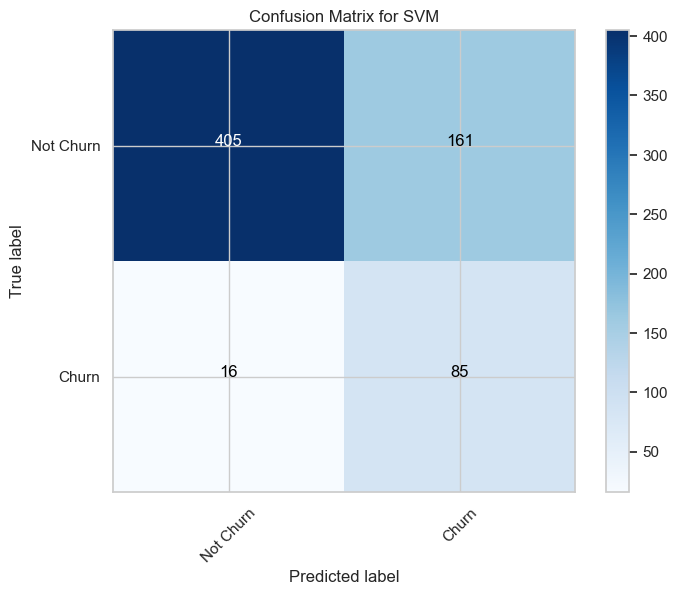

In [54]:
# Calculate the confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Create the confusion matrix plot
fig, ax = plt.subplots(figsize=(8, 6))
plt.imshow(cm_svm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for SVM')
plt.colorbar()

classes = ['Not Churn', 'Churn']
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm_svm.max() / 2.
for i in range(cm_svm.shape[0]):
    for j in range(cm_svm.shape[1]):
        plt.text(j, i, format(cm_svm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm_svm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [55]:
# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm:.2f}')

print("-----------------------------------\n")

# Display the classification report
report_svm = classification_report(y_test, y_pred_svm)
print('SVM Classification Report:\n', report_svm)

SVM Accuracy: 0.73
-----------------------------------

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.72      0.82       566
           1       0.35      0.84      0.49       101

    accuracy                           0.73       667
   macro avg       0.65      0.78      0.66       667
weighted avg       0.87      0.73      0.77       667



The Support Vector Machine (SVM) achieved an accuracy of 73%, with a notable precision of 96% for non-churning customers, implying its strong ability to accurately predict them. However, its lower recall (72%) and F1-score (0.82) for non-churning cases indicate some room for improvement. For churning customers, the SVM exhibited lower precision (35%) but a good recall (84%), resulting in an F1-score of 0.49. The macro and weighted average F1-scores were 0.66 and 0.77, respectively. While the SVM showed strengths in recall, its trade-off with precision suggests it might not be the most optimal model for this dataset, especially compared to Random Forest and XGBoost models with superior performance.

**K-Nearest Neighbors (KNN)**

In [56]:
# Initialize the KNN classifier with a chosen number of neighbors (e.g. 5)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model to your training data
knn.fit(x_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = knn.predict(x_test)

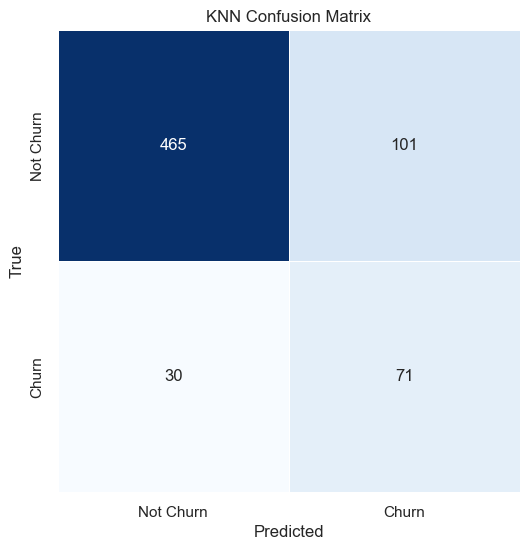

In [57]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=.5, square=True, cbar=False)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks([0.5, 1.5], ['Not Churn', 'Churn'])
plt.yticks([0.5, 1.5], ['Not Churn', 'Churn'])
plt.show()

In [58]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'KNN Accuracy: {accuracy:.2f}')

print("-----------------------------------\n")

# Display the classification report
report = classification_report(y_test, y_pred)
print('KNN Classification Report:\n', report)

KNN Accuracy: 0.80
-----------------------------------

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.82      0.88       566
           1       0.41      0.70      0.52       101

    accuracy                           0.80       667
   macro avg       0.68      0.76      0.70       667
weighted avg       0.86      0.80      0.82       667



The K-Nearest Neighbors (KNN) model achieved an 80% accuracy, displaying strong precision (94%) for non-churning customers but slightly lower recall (82%). It provided a balanced F1-score of 0.88 for non-churning. For churning customers, KNN had lower precision (41%) but maintained a reasonable recall (70%), resulting in a 0.52 F1-score. Overall, KNN offered reliable churn predictions with an 80% accuracy, though it didn't surpass Random Forest and XGBoost models in performance.

**ROC Curve**

The ROC curve, along with the AUC, provides a comprehensive and flexible framework for assessing and comparing the performance of classification models. It offers valuable insights into a model's ability to correctly classify positive and negative instances, making it an indispensable tool in the evaluation of machine learning models.

C:\Users\USER\AppData\Local\Temp\ipykernel_10200\537225275.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({


C:\Users\USER\AppData\Local\Temp\ipykernel_10200\537225275.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({
C:\Users\USER\AppData\Local\Temp\ipykernel_10200\537225275.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({
C:\Users\USER\AppData\Local\Temp\ipykernel_10200\537225275.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({
C:\Users\USER\AppData\Local\Temp\ipykernel_10200\537225275.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({


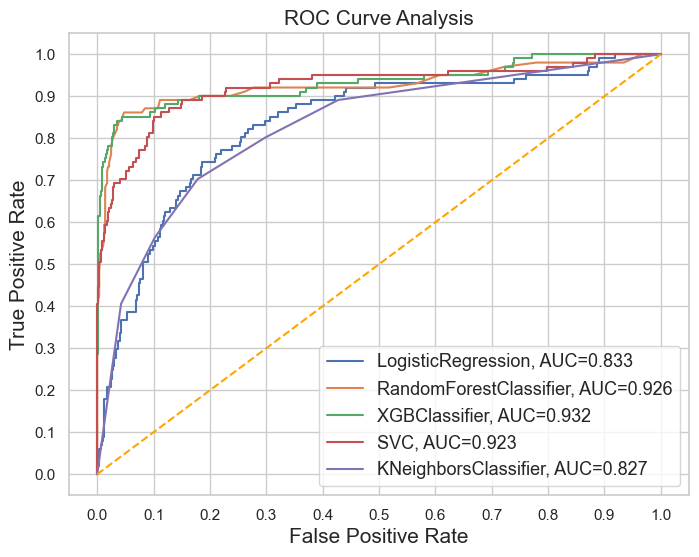

In [59]:
# Set the random seed for reproducibility
np.random.seed(42)

# Create a list of classifiers to compare
classifiers = [
    LogisticRegression(),
    RandomForestClassifier(),
    XGBClassifier(),
    SVC(probability=True),  # Use Support Vector Machine (SVC) with probability estimates
    KNeighborsClassifier()
]

# Create an empty DataFrame to store the results
result_table = pd.DataFrame(columns=['classifiers', 'fpr', 'tpr', 'auc'])

# Train the models and record the results
for cls in classifiers:
    # Fit the model on the resampled training data
    model = cls.fit(x_train_resampled, y_train_resampled)
    
    # Get the predicted probabilities for class 1 (churn)
    yproba = model.predict_proba(x_test)[:, 1]
    
    # Calculate the ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, yproba)
    auc = roc_auc_score(y_test, yproba)
    
    # Append the results to the result table
    result_table = result_table.append({
        'classifiers': cls.__class__.__name__,
        'fpr': fpr, 
        'tpr': tpr, 
        'auc': auc
    }, ignore_index=True)

# Set the classifier names as index labels
result_table.set_index('classifiers', inplace=True)

# Create a figure for plotting
fig = plt.figure(figsize=(8, 6))

# Plot ROC curves and AUC values for each classifier
for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
# Plot the diagonal reference line
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')

# Set the x-axis and y-axis ticks and labels
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

# Set the title and legend for the plot
plt.title('ROC Curve Analysis', fontsize=15)
plt.legend(prop={'size': 13}, loc='lower right')

# Show the ROC curve plot
plt.show()

The AUC values provide a quantitative measure of the models' discriminative power. A higher AUC indicates a better model for this classification task. Based on the AUC values, the XGBoost model stands out as the best performer, followed closely by the Random Forest model, demonstrating their strong classification capabilities.

**Summary of models**

In summary, the XGBoost model stands out as the best-performing model with a 95% accuracy and strong F1-scores for both non-churning and churning customers. It demonstrates a well-balanced ability to predict churn, making it the recommended choice for this dataset.

**Feature Importance**

Feature importance indicates the contribution of each feature to the model's predictions. Higher feature importance values suggest that a feature has a more significant impact on the model's predictions.

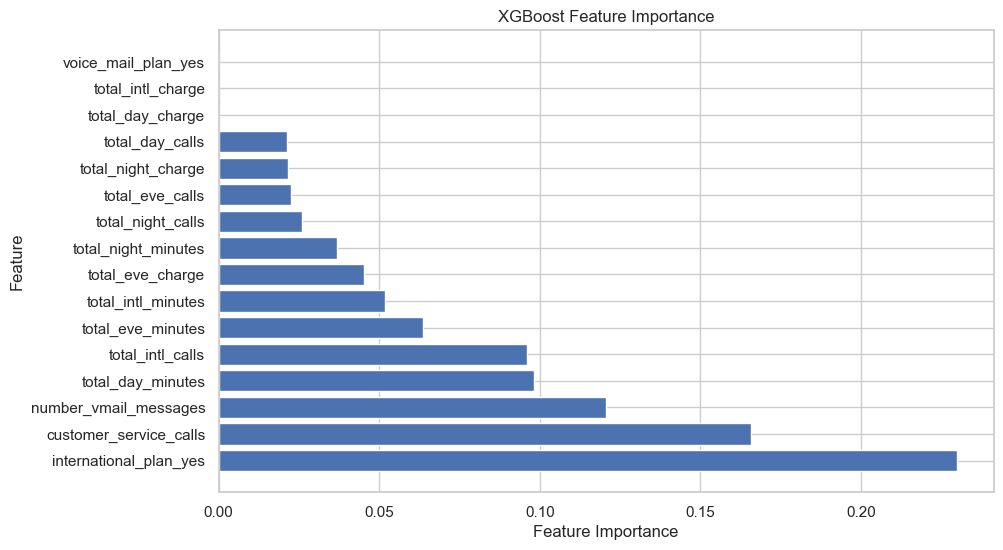

In [60]:
# Fit an XGBoost model
xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)

# Get feature importances
feature_importances = xgb_model.feature_importances_

# Get feature names from your DataFrame
feature_names = x_train.columns

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance')
plt.show()

## **Conclusion**

Based on the comprehensive analysis, several key conclusions are evident:

1. **Data Prep & Class Balancing**: Effective data preprocessing, including one-hot encoding for categorical variables, and class balancing using SMOTE are crucial for accurate predictions.

2. **Model Performance**: Various models were tested, with XGBoost emerging as the top performer, achieving a remarkable 95% accuracy and well-balanced precision and recall.

3. **Key Features**: The analysis pinpointed five influential features, notably "international_plan_yes," "customer_service_calls," "number_vmail_messages," "total_intl_calls," and "total_day_minutes," highlighting their importance in predicting churn.

In summary, the analysis recommends employing the XGBoost model for predicting customer churn. This data-driven solution can significantly aid in retaining customers, with particular focus on the identified key features.

## **Recommendations**

Based on the XGBoost model analysis and the top five influential features, here are key recommendations:

1. **Focus on International Plans**: Prioritize retaining customers with international plans, as they are more likely to churn. Investigate reasons behind this and enhance international plan value.

2. **Improve Customer Service**: High customer service calls correlate with churn. Enhance customer service to reduce calls and boost satisfaction.

3. **Optimize Voicemail Usage**: Analyze how voicemail messages impact churn and adjust offerings or communication strategies accordingly.

4. **Address International Calls**: Customers with more international calls may be prone to churn. Identify their needs and concerns and develop strategies for retention.

5. **Enhance Service Quality**: High total day minutes might signal service dissatisfaction. Investigate and improve service quality, offer customer education, and tailored solutions.

6. **Implement XGBoost Proactively**: Deploy the XGBoost model for real-time churn prediction, enabling personalized interventions.

7. **Segment Customers**: Segment customers based on top features for tailored retention strategies.

8. **Continuous Model Monitoring**: Regularly monitor and update the XGBoost model as new data becomes available to ensure relevancy.

9. **Customer Feedback Loop**: Establish a feedback loop with the customer service department to enhance service quality and satisfaction.

10. **Targeted Retention Campaigns**: Develop personalized retention campaigns using XGBoost insights, such as offers, loyalty programs, and proactive outreach.

Continuous assessment and adaptation are crucial in the churn prediction process, aiming to reduce churn, enhance retention, and drive business growth.